In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,y,x0,x1,x2,x3,x4
0,0,-0.245841,1.0,-0.383285,0.146907,-0.056307,0.021582
1,1,1.839005,1.0,0.831785,0.691866,0.575484,0.478679
2,2,0.859224,1.0,0.415071,0.172284,0.071510,0.029682
3,3,-0.174309,1.0,-0.628672,0.395228,-0.248469,0.156205
4,4,0.013225,1.0,-0.087517,0.007659,-0.000670,0.000059


In [37]:
df.describe()

,Unnamed: 0,y,x0,x1,x2,x3,x4
count,1000.000000,1000.000000,1000.0,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,499.500000,0.564833,1.0,0.226921,3.923071e-01,0.237920,4.482121e-01
std,288.819436,0.974895,0.0,0.584085,5.427724e-01,0.892370,1.467811e+00
min,0.000000,-16.720094,1.0,-1.634782,3.961433e-08,-4.368976,1.569295e-15
25%,249.750000,-0.012034,1.0,-0.149325,3.690509e-02,-0.003330,1.362021e-03
50%,499.500000,0.347705,1.0,0.225975,1.758173e-01,0.011540,3.091173e-02
75%,749.250000,1.174863,1.0,0.640172,5.589044e-01,0.262356,3.123773e-01
max,999.000000,2.411114,1.0,2.333421,5.444855e+00,12.705139,2.964644e+01


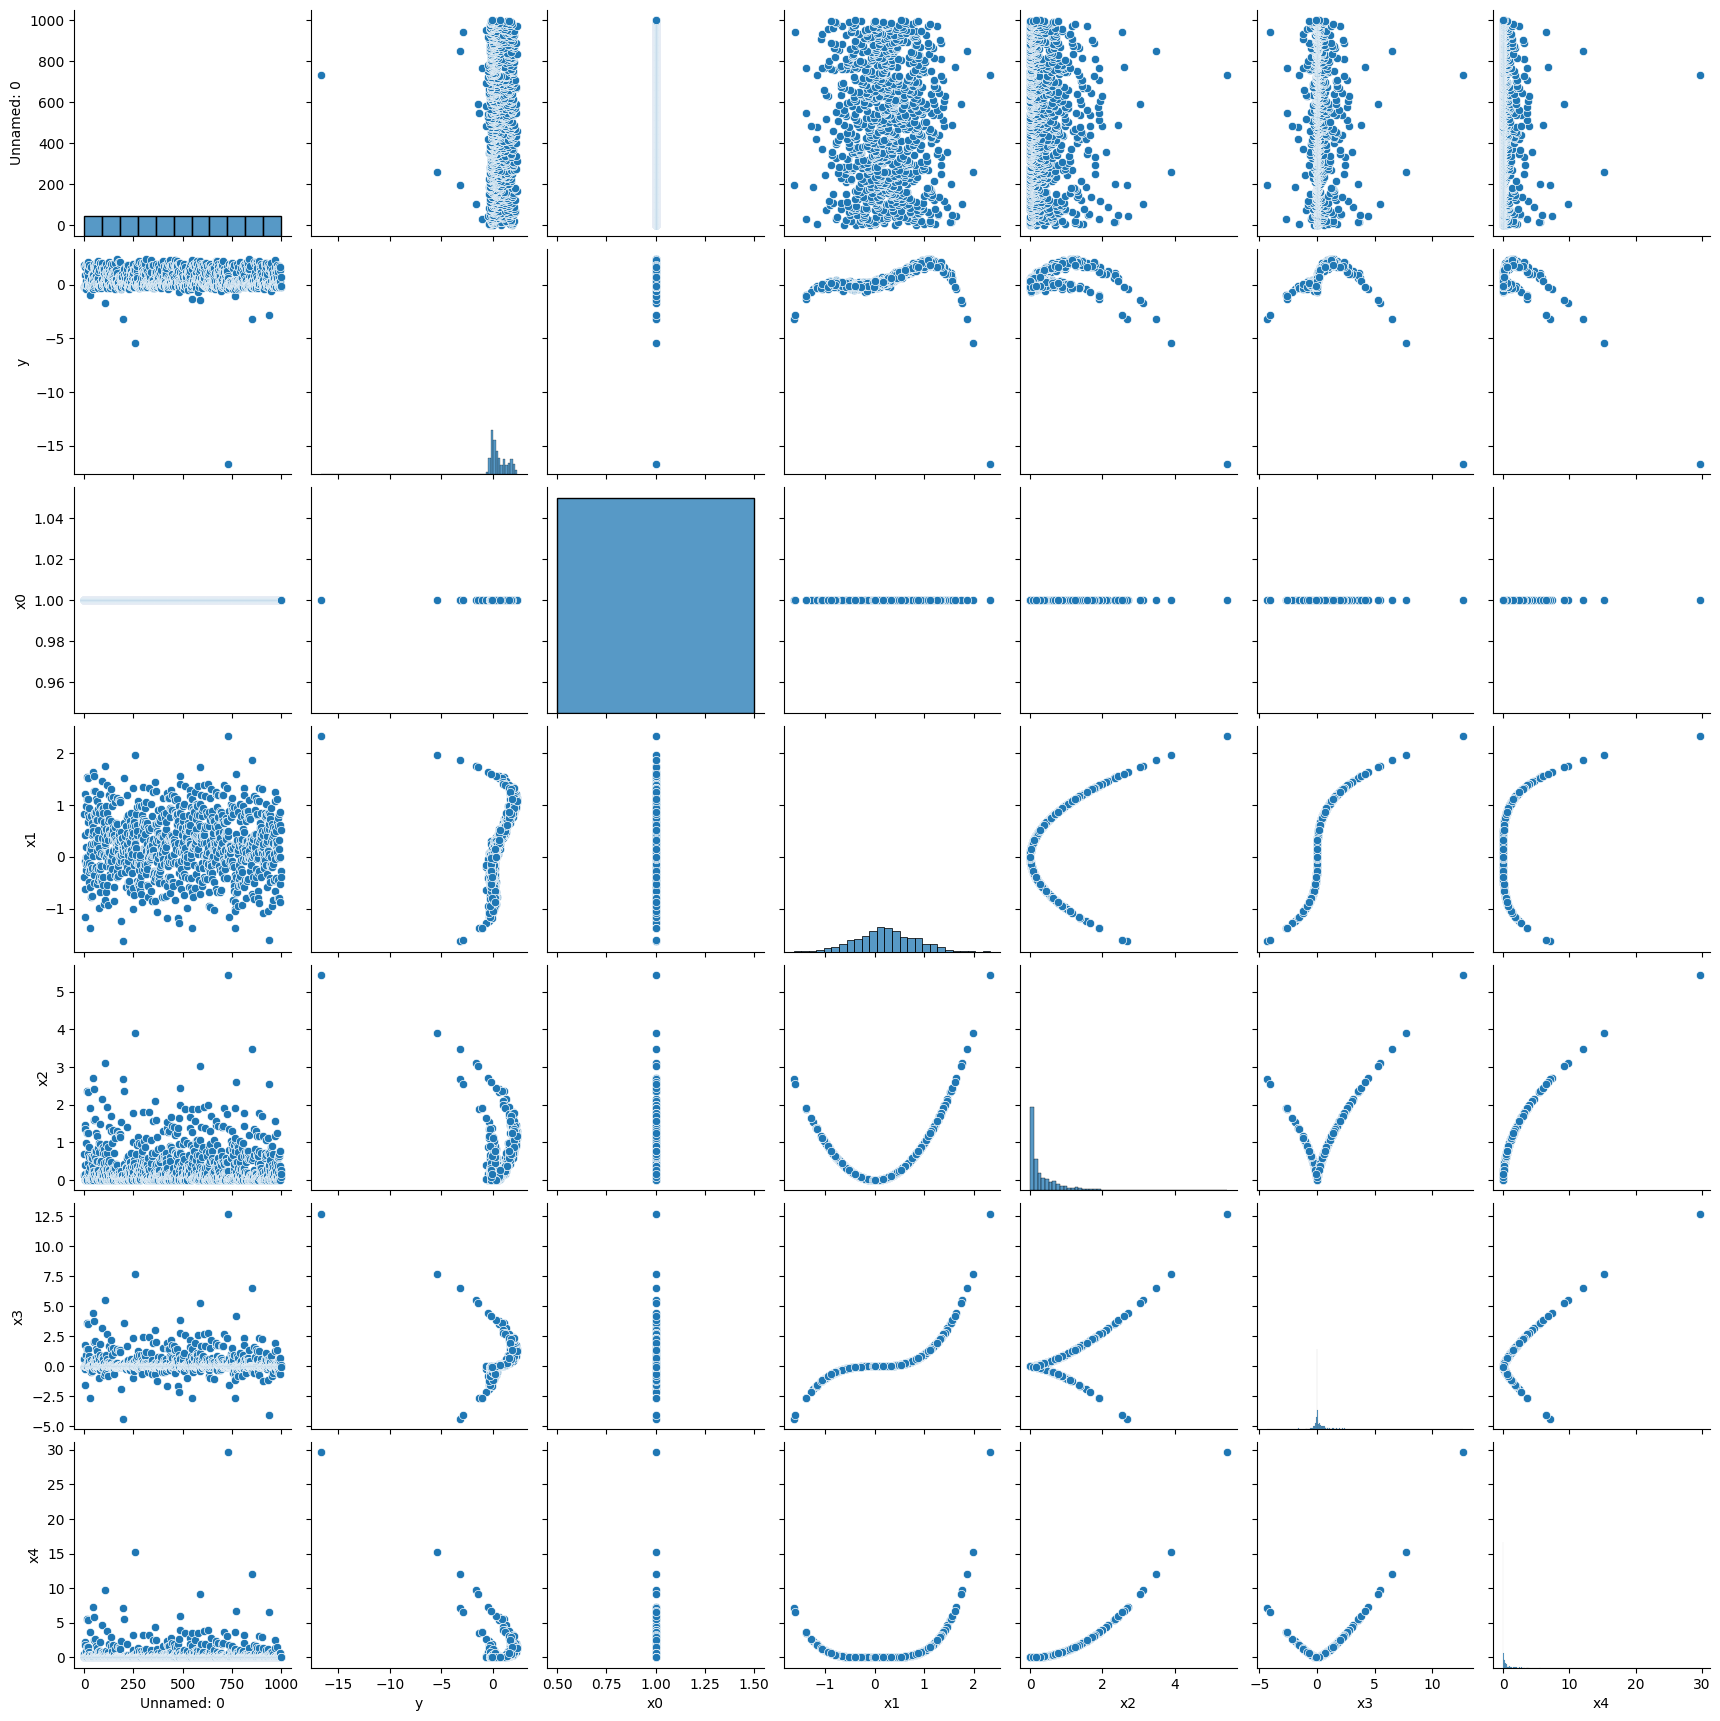

In [5]:
sns.pairplot(df)

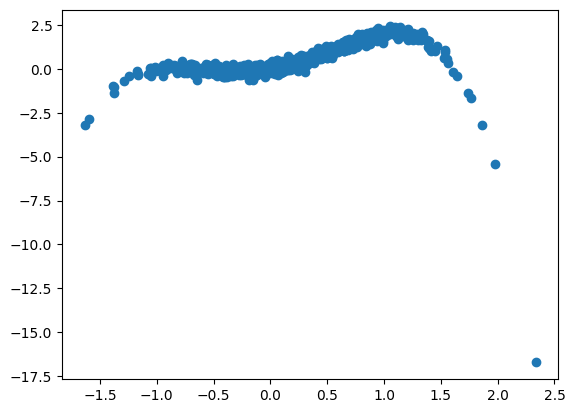

In [6]:
x, y = df.x1, df.y
plt.scatter(x, y)

In [7]:
idx = np.random.rand((len(df))) < 0.8
train = df[idx]
test = df[~idx]
print(len(test), len(train))

185 815


In [19]:
train_x = train["x1"].to_numpy()
train_y = train["y"].to_numpy()
test_x = test["x1"].to_numpy()
test_y = test["y"].to_numpy()

In [63]:
def polynomial_feature_transform(x, degree):
    x_transform = x
    first_shape = x_transform.shape[0]
    for i  in range(2, degree + 1):
        additional_layer = x**i
        x_transform = np.concatenate((x_transform.reshape((first_shape,i - 1)), additional_layer.reshape((first_shape, 1))), axis = 1)
    return x_transform

In [68]:
def polynomial_regression(Xbar, y):
    A = np.dot(Xbar.T, Xbar)
    B = np.dot(Xbar.T, y)
    return np.dot(np.linalg.pinv(A), B)

In [81]:
x_transform = polynomial_feature_transform(train_x, 4)
Xbar = np.concatenate((x_transform, np.ones((x_transform.shape[0], 1))), axis = 1)
w = polynomial_regression(Xbar, train_y)

[[ 4.15070791e-01  1.72283761e-01  7.15099569e-02  2.96816944e-02
   1.00000000e+00]
 [-6.28671916e-01  3.95228379e-01 -2.48468982e-01  1.56205471e-01
   1.00000000e+00]
 [-8.75168136e-02  7.65919267e-03 -6.70308138e-04  5.86632324e-05
   1.00000000e+00]
 ...
 [ 6.20278493e-01  3.84745409e-01  2.38649303e-01  1.48029030e-01
   1.00000000e+00]
 [ 8.74119183e-01  7.64084346e-01  6.67900784e-01  5.83824887e-01
   1.00000000e+00]
 [-2.80440760e-01  7.86470197e-02 -2.20558299e-02  6.18535370e-03
   1.00000000e+00]] (815, 5)
[ 1.01815212  1.95099433 -0.01910362 -0.972248    0.01130749] (5,)


In [70]:
def compute_cost(Y, Y_):
    return np.mean((Y - Y_)**2)

In [87]:
def predict(w, input):
    return input @ w

0.0296953911971665


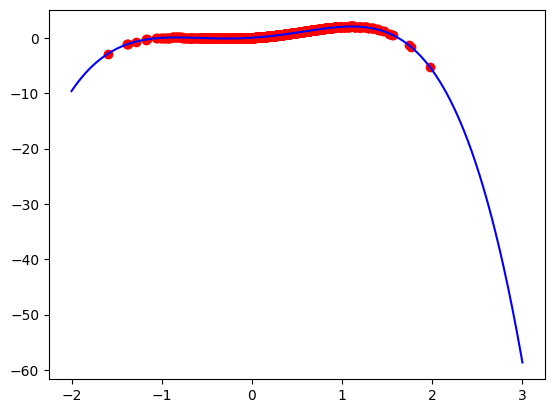

In [91]:
input = np.linspace(-2,3, 1000)
print(compute_cost(train_y, predict(w, Xbar)))
output = w[0] * input + w[1]  * input**2  + w[2] * input  ** 3 + w[3] * input ** 4+ w[4]
plt.scatter(train_x, predict(w, Xbar), c = "red")
plt.plot(input, output, 'blue')